In [2]:
!pip install biotite

In [3]:
#Create Matrix to handle 12 individual genomes 
rows = 119
cols = 119

matrix = [[0 for i in range(cols)] for j in range(rows)]  #stores the distance matrix between the gemones 

genome_names = [] #stores the name and position of the genomes for traceback

In [4]:
high_sub_rate = 0

In [5]:
def compare(string1, string2):
    
    """
    Compares the individual bases between two sequences of two different species
    Note: This method ignores gaps
    
    Parameters
    ----------
    string1 : str
        The dna sequence of first species 
    string2 : str
        The dna sequence of first species 
    """
    
    match_no = 0
    mismatch_no = 0

    for i, base in enumerate(string1):
        
        if (string1[i] not in ["A", "C", "T", "G"]):
            continue

        if (string2[i] not in ["A", "C", "T", "G"]):
            continue
                     
        if (string1[i] == string2[i]):
            match_no = match_no + 1
            
        elif (string1[i] != string2[i]):
            mismatch_no = mismatch_no + 1
                
    return match_no, mismatch_no

In [6]:
def compare_alt(string1, string2):
    
    """
    Compares the individual bases between two sequences of two different species
    Note: This method ignores gaps
    
    Parameters
    ----------
    string1 : str
        The dna sequence of first species 
    string2 : str
        The dna sequence of first species 
    """
    string_len = len(string1)
    
    if string_len > len(string2):
        string_len = len(string2)
    
    match_no = 0
    mismatch_no = 0

    for i in range(string_len):
        
        if (string1[i] not in ["A", "C", "T", "G"]):
            continue

        if (string2[i] not in ["A", "C", "T", "G"]):
            continue
                     
        if (string1[i] == string2[i]):
            match_no = match_no + 1
            
        elif (string1[i] != string2[i]):
            mismatch_no = mismatch_no + 1
                
    return match_no, mismatch_no

In [7]:
def compute_substitution_rate(match, mismatch):
    
    global high_sub_rate
    

    """
    Computes the substitution rate between two species 
    
    Parameters
    ----------
    match : str
        The total count of base pair matches between species 

    mismatch : str
        The total count of base pair mismatches between species 
        
    returns: int
        The substitution rate
        
    """
    
    if match == 0:

        high_sub_rate = high_sub_rate + 1
        return 1
    
    substitution_rate = mismatch / (match + mismatch)
    
    return substitution_rate

In [8]:
def read_and_compare(filename1):
    
    """
    Reads each line in the file and extracts the lines corresponding to dna sequences 
    compares these sequences using the compare method. 
    
    Parameters
    ----------
    filename : str
        The maf file containing the sequences 
    """
    
    global matrix
    global genome_names 
    
    with open(filename1) as f1:
        lines = [line.rstrip() for line in f1]

    count_row = 0 #keeps track of the rows in the matrix
    for i, sequence in enumerate(lines):
        
        if sequence[0] == "s":
            
            seq1 = lines[i].split()[-1].upper()
            seqname = lines[i].split()[1].upper()
            
            genome_names.append(seqname)
        
            count_col = 0 #keeps tracks of the columns in the matrix 
            for j, sequence in enumerate(lines):
                
                if sequence[0] == "s":
            
                    seq2 = lines[j].split()[-1].upper()
            
                    match, mismatch = compare(seq1, seq2) 
                    substi_ratio = compute_substitution_rate(match, mismatch)
                    
                    matrix[count_row][count_col] = substi_ratio
                    
                    count_col = count_col + 1
                    
            count_row = count_row + 1
                    

In [9]:
def display(distance_matrix):
    print("\n The Distance Matrix is:")
                                                
    for i in distance_matrix:
        for j in i:
            print("{:.13f}".format(j), end=" ")
        print()

In [10]:
high_sub_rate = 0
genome_names = []
read_and_compare("fullfile.maf")

In [11]:
# display(matrix)

In [12]:
# for i, virus in enumerate(genome_names):
#     print(i, virus)

In [13]:
import numpy as np
from biotite.sequence.phylo import upgma

In [14]:
#Convert matrix to a numpy array for downstream analysis (UPGMA)
new_matrix = np.array(matrix)

In [15]:
full_tree = upgma(new_matrix)

In [16]:
print(full_tree.to_newick(include_distance=True, labels = genome_names))
print("\n", high_sub_rate)

(((WIGEON_COV_HKU20:0.1779514104127884,(NIGHT-HERON_COV_HKU19:0.1666831225156784,(COMMON-MOORHEN_COV_HKU21:0.1289980560541153,(((PORCINE_COV_HKU15_STRAIN_HKU15-155:0.05078167840838432,SPARROW_COV_HKU17:0.05078167840838432):0.04353591427206993,(MAGPIE-ROBIN_COV_HKU18:0.08150064945220947,MUNIA_COV_HKU13-3514:0.08150064945220947):0.012816943228244781):0.01377001404762268,(WHITE-EYE_COV_HKU16:0.0958058089017868,(THRUSH_COV_HKU12-600:0.08347466588020325,BULBUL_COV_HKU11-934:0.08347466588020325):0.012331143021583557):0.01228179782629013):0.02091044932603836):0.03768506646156311):0.011268287897109985):0.03698953986167908,(BELUGA_WHALE_COV_SW1:0.1985316276550293,(TURKEY_COV:0.049901220947504044,AVIAN_INFECTIOUS_BRONCHITIS_VIRUS:0.049901220947504044):0.14863041043281555):0.01640932261943817):0.004000842571258545,(((ROUSETTUS_BAT_COV_GCCDC1_356:0.13220585882663727,BAT_COV_HKU9-1:0.13220585882663727):0.06927074491977692,((HUMAN_COV_HKU1:0.10869016498327255,((BETACOV_HKU24_STRAIN_HKU24-R05005I:0.0

## Phylogenetic Tree with Distance 
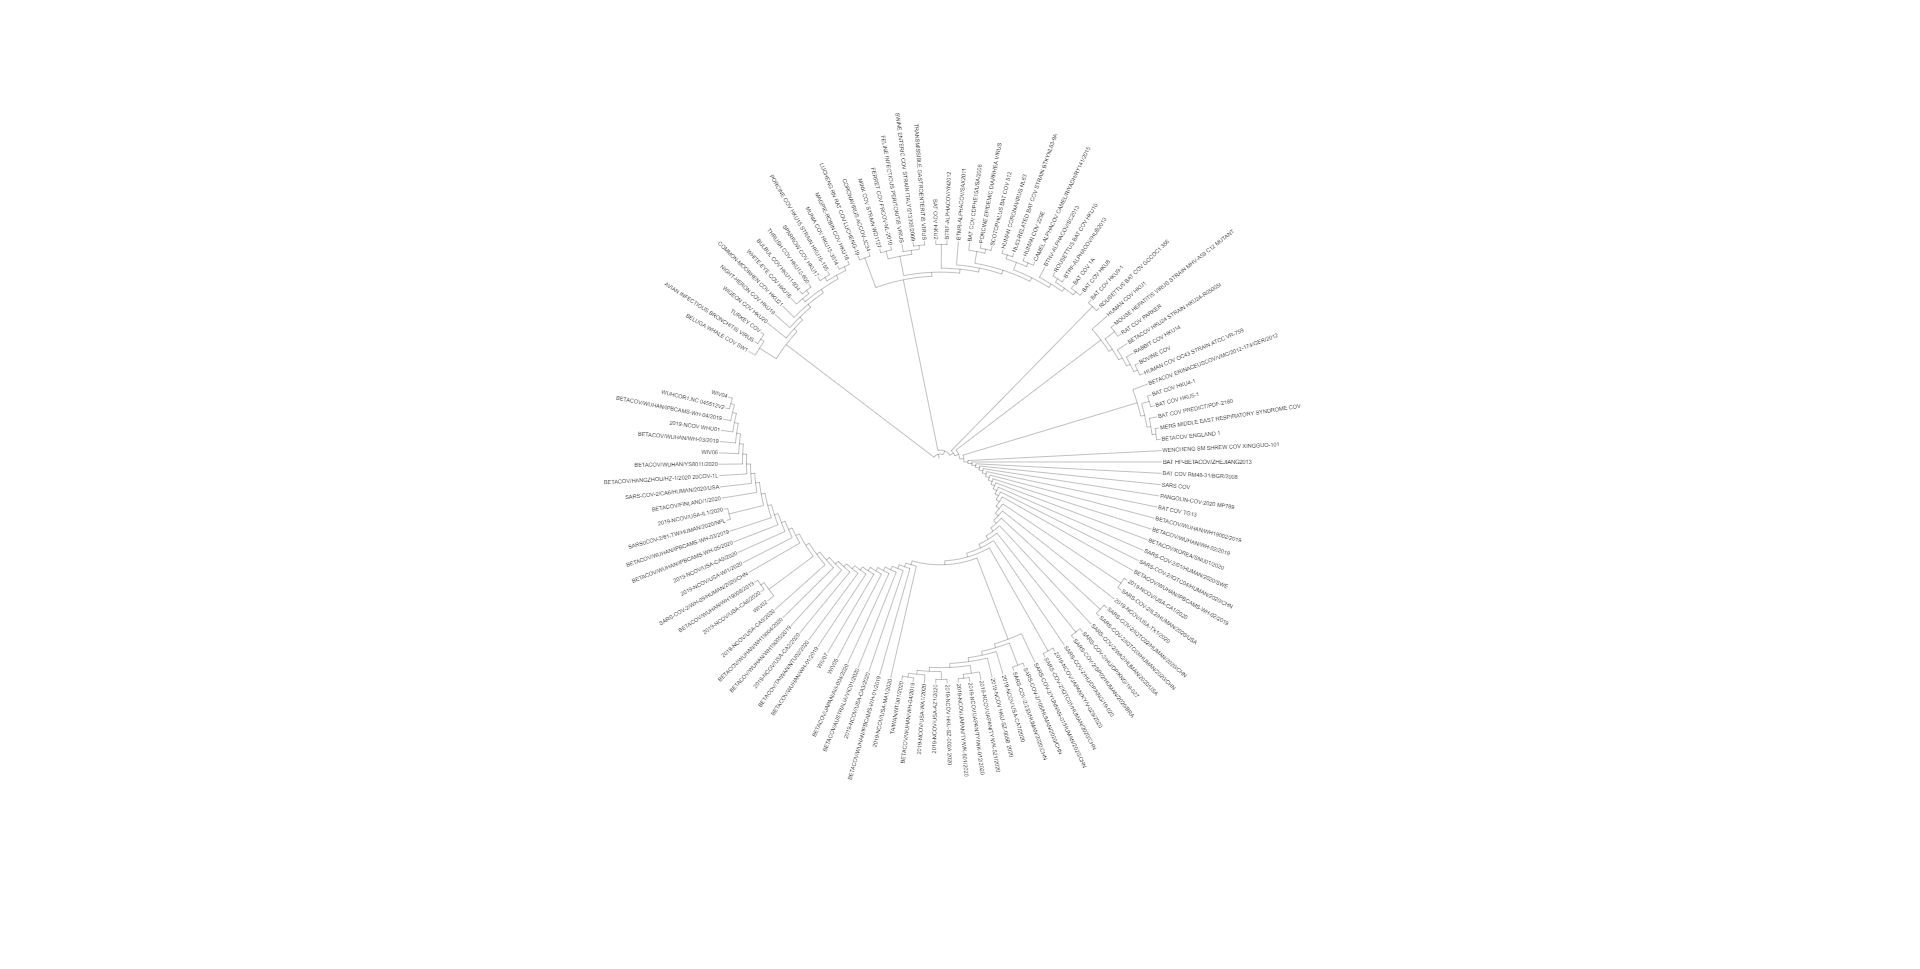

### Phylogenetic Analysis Using Select Genes

In [17]:
def get_gene_sequence (name, start, end, sequence): 
    

    """
    Gets the gene sequence given the start and end positions of the gene 
    
    Parameters
    ----------
    name : str
        The name of the gene 

    start : int
        The start position of the gene 
        
    end: int
        The end position of the gene
        
    sequence: str
        The whole genoic sequence including gaps from the global alignment 
        
    """
    
    new_sequence = "" 
    #stores the updated sequence without the gaps 
    
    for base in sequence:
        
        if (base.isalpha() == True):  #gets rid of gaps
            
            new_sequence = new_sequence + base 
            
        else:
            continue 
            
    new_sequence = new_sequence[start-1:end] #since MAF files start at index 0 while 
    
    return new_sequence 

In [18]:
def read_and_compare_gene (name, start, end, filename1):
    
    name = name 
    start = start
    end = end 
    
    """
    Reads each line in the file and extracts the lines corresponding to dna sequences 
    compares these sequences using the compare method. 
    
    Parameters
    ----------
    filename : str
        The maf file containing the sequences 
    """
    
    global matrix
    global genome_names 
    
    with open(filename1) as f1:
        lines = [line.rstrip() for line in f1]

    count_row = 0 #keeps track of the rows in the matrix
    for i, sequence in enumerate(lines):
        
        if sequence[0] == "s":
            
            seq1 = lines[i].split()[-1].upper()
            
            seq1 = get_gene_sequence(name, start, end, seq1) #Get the gene from the whole genome sequence 
            
            seqname = lines[i].split()[1].upper()
            
            genome_names.append(seqname)
        
            count_col = 0 #keeps tracks of the columns in the matrix 
            for j, sequence in enumerate(lines):
                
                if sequence[0] == "s":
            
                    seq2 = lines[j].split()[-1].upper()
                
                    seq2 = get_gene_sequence(name, start, end, seq2) #Get the gene from the whole genome sequence 
                    
                    match, mismatch = compare_alt(seq1, seq2) 
                
                    substi_ratio = compute_substitution_rate(match, mismatch)
                    
                    matrix[count_row][count_col] = substi_ratio
                    
                    count_col = count_col + 1
                    
            count_row = count_row + 1                  

#### orf1a gene

In [19]:
high_sub_rate = 0
genome_names = []
read_and_compare_gene("orf1a", 265, 13467, "fullfile.maf")

In [21]:
# display(matrix)

In [22]:
genome_names[0:10]

['WUHCOR1.NC_045512V2',
 'WIV04',
 'BETACOV/WUHAN/IPBCAMS-WH-04/2019',
 '2019-NCOV_WHU01',
 'BETACOV/WUHAN/WH-03/2019',
 'WIV06',
 'BETACOV/WUHAN/YS8011/2020',
 'BETACOV/HANGZHOU/HZ-1/2020_20COV-1L',
 '2019-NCOV/USA-CA8/2020',
 'BETACOV/WUHAN/WH19008/2019']

In [84]:
#Convert matrix to a numpy array for downstream analysis (UPGMA)
orf1a_matrix = np.array(matrix)

#produce the phylogenetic tree
orf1a_tree = upgma(orf1a_matrix)

#get the phylogenetic tree
print(orf1a_tree.to_newick(include_distance=False, labels = genome_names))

print("\n", high_sub_rate)

((((((((((((((((((((((((WIGEON_COV_HKU20,COMMON-MOORHEN_COV_HKU21),((HUMAN_CORONAVIRUS_NL63,(HUMAN_COV_HKU1,WENCHENG_SM_SHREW_COV_XINGGUO-101)),BOVINE_COV)),CAMEL_ALPHACOV_CAMEL/RIYADH/RY141/2015),(LUCHENG_RN_RAT_COV_LUCHENG-19,BAT_COV_HKU4-1)),(ROUSETTUS_BAT_COV_HKU10,BTRF-ALPHACOV/YN2012)),TURKEY_COV),((CORONAVIRUS_ACCOV-JC34,BAT_COV_1A),RAT_COV_PARKER)),(FELINE_INFECTIOUS_PERITONITIS_VIRUS,BELUGA_WHALE_COV_SW1)),(HUMAN_COV_OC43_STRAIN_ATCC_VR-759,MERS_MIDDLE_EAST_RESPIRATORY_SYNDROME_COV)),(BTRF-ALPHACOV/HUB2013,NL63-RELATED_BAT_COV_STRAIN_BTKYNL63-9A)),(HUMAN_COV_229E,MOUSE_HEPATITIS_VIRUS_STRAIN_MHV-A59_C12_MUTANT)),((BAT_COV_HKU2,AVIAN_INFECTIOUS_BRONCHITIS_VIRUS),WHITE-EYE_COV_HKU16)),(((BAT_COV_CDPHE15/USA/2006,MINK_COV_STRAIN_WD1127),BTNV-ALPHACOV/SC2013),((THRUSH_COV_HKU12-600,(((BAT_COV_TG13,SARS0COV-2/61-TW/HUMAN/2020/NPL),SARS-COV-2/IQTC03/HUMAN/2020/CHN),((((((BETACOV/KOREA/SNU01/2020,((((((((((((((2019-NCOV/USA-IL1/2020,(BETACOV/AUSTRALIA/VIC01/2020,(BETACOV/WUHAN/WH1900

#### orf1b

In [85]:
high_sub_rate = 0
genome_names = []
read_and_compare_gene("orf1b", 13467, 21554, "fullfile.maf")

In [86]:
#Convert matrix to a numpy array for downstream analysis (UPGMA)
orf1b_matrix = np.array(matrix)

#produce the phylogenetic tree
orf1b_tree = upgma(orf1b_matrix)

#get the phylogenetic tree
print(orf1b_tree.to_newick(include_distance=False, labels = genome_names))

print("\n", high_sub_rate)

(WIGEON_COV_HKU20,((((((((((ROUSETTUS_BAT_COV_GCCDC1_356,(HUMAN_CORONAVIRUS_NL63,2019-NCOV_HKU-SZ-002A_2020)),BETACOV_HKU24_STRAIN_HKU24-R05005I),((FERRET_COV_FRCOV-NL-2010,BAT_COV_HKU4-1),AVIAN_INFECTIOUS_BRONCHITIS_VIRUS)),(((RABBIT_COV_HKU14,WIV06),SARS-COV-2/WA2/HUMAN/2020/USA),(HUMAN_COV_OC43_STRAIN_ATCC_VR-759,BOVINE_COV))),(RAT_COV_PARKER,BETACOV/WUHAN/WH-02/2019)),(((TURKEY_COV,BAT_COV_HKU5-1),((BETACOV_ERINACEUSCOV/VMC/2012-174/GER/2012,BAT_COV_PREDICT/PDF-2180),BETACOV/WUHAN/WH-03/2019)),MERS_MIDDLE_EAST_RESPIRATORY_SYNDROME_COV)),(((BAT_COV_HKU9-1,BETACOV/WUHAN/WH19002/2019),((((ROUSETTUS_BAT_COV_HKU10,BETACOV/WUHAN/WH-04/2019),((HUMAN_COV_HKU1,WENCHENG_SM_SHREW_COV_XINGGUO-101),PANGOLIN-COV-2020_MP789)),((BAT_COV_BM48-31/BGR/2008,((SARS-COV-2/IQTC04/HUMAN/2020/CHN,2019-NCOV_WHU01),SARS-COV-2/IQTC01/HUMAN/2020/CHN)),(BETACOV/WUHAN/WH-01/2019,WIV07))),(NL63-RELATED_BAT_COV_STRAIN_BTKYNL63-9A,SARS-COV-2/HU/DP/KNG/19-027))),(BAT_COV_CDPHE15/USA/2006,BAT_COV_HKU2))),((MOUSE_HEPA

#### S gene

In [25]:
high_sub_rate = 0
genome_names = []
read_and_compare_gene("S", 21562, 25383, "fullfile.maf")

In [26]:
#Convert matrix to a numpy array for downstream analysis (UPGMA)
s_matrix = np.array(matrix)

#produce the phylogenetic tree
s_tree = upgma(s_matrix)

#get the phylogenetic tree
print(s_tree.to_newick(include_distance=True, labels = genome_names))

print("\n", high_sub_rate)

(WIGEON_COV_HKU20:0.5,(ROUSETTUS_BAT_COV_GCCDC1_356:0.5,(BAT_COV_HKU9-1:0.5,(CORONAVIRUS_ACCOV-JC34:0.5,(LUCHENG_RN_RAT_COV_LUCHENG-19:0.5,(BTMR-ALPHACOV/SAX2011:0.5,(BTRF-ALPHACOV/HUB2013:0.5,(ROUSETTUS_BAT_COV_HKU10:0.5,(BAT_COV_CDPHE15/USA/2006:0.5,(BTNV-ALPHACOV/SC2013:0.5,(BTRF-ALPHACOV/YN2012:0.5,(BAT_COV_HKU2:0.5,(BAT_COV_HKU8:0.5,(BAT_COV_1A:0.5,(SCOTOPHILUS_BAT_COV_512:0.5,(NL63-RELATED_BAT_COV_STRAIN_BTKYNL63-9A:0.5,(HUMAN_CORONAVIRUS_NL63:0.5,(CAMEL_ALPHACOV_CAMEL/RIYADH/RY141/2015:0.5,(HUMAN_COV_229E:0.5,(FERRET_COV_FRCOV-NL-2010:0.5,(MINK_COV_STRAIN_WD1127:0.5,(PORCINE_EPIDEMIC_DIARRHEA_VIRUS:0.5,(TRANSMISSIBLE_GASTROENTERITIS_VIRUS:0.5,(SWINE_ENTERIC_COV_STRAIN_ITALY/213306/2009:0.5,(FELINE_INFECTIOUS_PERITONITIS_VIRUS:0.5,(BELUGA_WHALE_COV_SW1:0.5,(HUMAN_COV_HKU1:0.5,(BETACOV_HKU24_STRAIN_HKU24-R05005I:0.5,(RABBIT_COV_HKU14:0.5,(HUMAN_COV_OC43_STRAIN_ATCC_VR-759:0.5,(BOVINE_COV:0.5,(RAT_COV_PARKER:0.5,(MOUSE_HEPATITIS_VIRUS_STRAIN_MHV-A59_C12_MUTANT:0.5,((BAT_HP-BETACOV/

#### E Gene

In [89]:
high_sub_rate = 0
genome_names = []
read_and_compare_gene("E", 26244, 26471, "fullfile.maf")

In [90]:
#Convert matrix to a numpy array for downstream analysis (UPGMA)
e_matrix = np.array(matrix)

#produce the phylogenetic tree
e_tree = upgma(e_matrix)

#get the phylogenetic tree
print(e_tree.to_newick(include_distance=True, labels = genome_names))

print("\n", high_sub_rate)

(WIGEON_COV_HKU20:0.5,(ROUSETTUS_BAT_COV_GCCDC1_356:0.5,(BAT_COV_HKU9-1:0.5,(CORONAVIRUS_ACCOV-JC34:0.5,(LUCHENG_RN_RAT_COV_LUCHENG-19:0.5,(BTMR-ALPHACOV/SAX2011:0.5,(BTRF-ALPHACOV/HUB2013:0.5,(ROUSETTUS_BAT_COV_HKU10:0.5,(BAT_COV_CDPHE15/USA/2006:0.5,(BTNV-ALPHACOV/SC2013:0.5,(BTRF-ALPHACOV/YN2012:0.5,(BAT_COV_HKU2:0.5,(BAT_COV_HKU8:0.5,(BAT_COV_1A:0.5,(SCOTOPHILUS_BAT_COV_512:0.5,(NL63-RELATED_BAT_COV_STRAIN_BTKYNL63-9A:0.5,(HUMAN_CORONAVIRUS_NL63:0.5,(CAMEL_ALPHACOV_CAMEL/RIYADH/RY141/2015:0.5,(HUMAN_COV_229E:0.5,(FERRET_COV_FRCOV-NL-2010:0.5,(MINK_COV_STRAIN_WD1127:0.5,(PORCINE_EPIDEMIC_DIARRHEA_VIRUS:0.5,(TRANSMISSIBLE_GASTROENTERITIS_VIRUS:0.5,(SWINE_ENTERIC_COV_STRAIN_ITALY/213306/2009:0.5,(FELINE_INFECTIOUS_PERITONITIS_VIRUS:0.5,(BELUGA_WHALE_COV_SW1:0.5,(HUMAN_COV_HKU1:0.5,(BETACOV_HKU24_STRAIN_HKU24-R05005I:0.5,(RABBIT_COV_HKU14:0.5,(HUMAN_COV_OC43_STRAIN_ATCC_VR-759:0.5,(BOVINE_COV:0.5,(RAT_COV_PARKER:0.5,(MOUSE_HEPATITIS_VIRUS_STRAIN_MHV-A59_C12_MUTANT:0.5,(BAT_HP-BETACOV/Z

#### M Gene

In [91]:
high_sub_rate = 0
genome_names = []
read_and_compare_gene("M",26522, 27190, "fullfile.maf")

In [92]:
#Convert matrix to a numpy array for downstream analysis (UPGMA)
m_matrix = np.array(matrix)

#produce the phylogenetic tree
m_tree = upgma(m_matrix)

#get the phylogenetic tree
print(m_tree.to_newick(include_distance=True, labels = genome_names))

print("\n", high_sub_rate)

(WIGEON_COV_HKU20:0.5,(ROUSETTUS_BAT_COV_GCCDC1_356:0.5,(BAT_COV_HKU9-1:0.5,(CORONAVIRUS_ACCOV-JC34:0.5,(LUCHENG_RN_RAT_COV_LUCHENG-19:0.5,(BTMR-ALPHACOV/SAX2011:0.5,(BTRF-ALPHACOV/HUB2013:0.5,(ROUSETTUS_BAT_COV_HKU10:0.5,(BAT_COV_CDPHE15/USA/2006:0.5,(BTNV-ALPHACOV/SC2013:0.5,(BTRF-ALPHACOV/YN2012:0.5,(BAT_COV_HKU2:0.5,(BAT_COV_HKU8:0.5,(BAT_COV_1A:0.5,(SCOTOPHILUS_BAT_COV_512:0.5,(NL63-RELATED_BAT_COV_STRAIN_BTKYNL63-9A:0.5,(HUMAN_CORONAVIRUS_NL63:0.5,(CAMEL_ALPHACOV_CAMEL/RIYADH/RY141/2015:0.5,(HUMAN_COV_229E:0.5,(FERRET_COV_FRCOV-NL-2010:0.5,(MINK_COV_STRAIN_WD1127:0.5,(PORCINE_EPIDEMIC_DIARRHEA_VIRUS:0.5,(TRANSMISSIBLE_GASTROENTERITIS_VIRUS:0.5,(SWINE_ENTERIC_COV_STRAIN_ITALY/213306/2009:0.5,(FELINE_INFECTIOUS_PERITONITIS_VIRUS:0.5,(BELUGA_WHALE_COV_SW1:0.5,(HUMAN_COV_HKU1:0.5,(BETACOV_HKU24_STRAIN_HKU24-R05005I:0.5,(RABBIT_COV_HKU14:0.5,(HUMAN_COV_OC43_STRAIN_ATCC_VR-759:0.5,(BOVINE_COV:0.5,(RAT_COV_PARKER:0.5,(MOUSE_HEPATITIS_VIRUS_STRAIN_MHV-A59_C12_MUTANT:0.5,(BAT_HP-BETACOV/Z

#### N Gene

In [23]:
high_sub_rate = 0
genome_names = []
read_and_compare_gene("N",28273, 29532, "fullfile.maf")

In [24]:
#Convert matrix to a numpy array for downstream analysis (UPGMA)
n_matrix = np.array(matrix)

#produce the phylogenetic tree
n_tree = upgma(n_matrix)

#get the phylogenetic tree
print(n_tree.to_newick(include_distance=True, labels = genome_names))

print("\n", high_sub_rate)

(WIGEON_COV_HKU20:0.5,(ROUSETTUS_BAT_COV_GCCDC1_356:0.5,(BAT_COV_HKU9-1:0.5,(CORONAVIRUS_ACCOV-JC34:0.5,(LUCHENG_RN_RAT_COV_LUCHENG-19:0.5,(BTMR-ALPHACOV/SAX2011:0.5,(BTRF-ALPHACOV/HUB2013:0.5,(ROUSETTUS_BAT_COV_HKU10:0.5,(BAT_COV_CDPHE15/USA/2006:0.5,(BTNV-ALPHACOV/SC2013:0.5,(BTRF-ALPHACOV/YN2012:0.5,(BAT_COV_HKU2:0.5,(BAT_COV_HKU8:0.5,(BAT_COV_1A:0.5,(SCOTOPHILUS_BAT_COV_512:0.5,(NL63-RELATED_BAT_COV_STRAIN_BTKYNL63-9A:0.5,(HUMAN_CORONAVIRUS_NL63:0.5,(CAMEL_ALPHACOV_CAMEL/RIYADH/RY141/2015:0.5,(HUMAN_COV_229E:0.5,(FERRET_COV_FRCOV-NL-2010:0.5,(MINK_COV_STRAIN_WD1127:0.5,(PORCINE_EPIDEMIC_DIARRHEA_VIRUS:0.5,(TRANSMISSIBLE_GASTROENTERITIS_VIRUS:0.5,(SWINE_ENTERIC_COV_STRAIN_ITALY/213306/2009:0.5,(FELINE_INFECTIOUS_PERITONITIS_VIRUS:0.5,(BELUGA_WHALE_COV_SW1:0.5,(HUMAN_COV_HKU1:0.5,(BETACOV_HKU24_STRAIN_HKU24-R05005I:0.5,(RABBIT_COV_HKU14:0.5,(HUMAN_COV_OC43_STRAIN_ATCC_VR-759:0.5,(BOVINE_COV:0.5,(RAT_COV_PARKER:0.5,(MOUSE_HEPATITIS_VIRUS_STRAIN_MHV-A59_C12_MUTANT:0.5,(BAT_HP-BETACOV/Z